Over uw voedselbos:

Q1: Wat is de naam van uw voedselbos?

Q2: Wat is de grootte van uw voedselbos?

Q3: In welke provincie is uw voedselbos gelokaliseerd?

Q4: In welk jaar is uw voedselbos opgezet?

Q5: Wat zijn uw belangrijkste producten?
Meerdere antwoorden mogelijk

Verkoop en zakelijke relaties:

Q6: Verkoopt u momenteel producten van uw voedselbos?

Q7: Aan wie levert u voornamelijk?
Meerdere antwoorden mogelijk

Q8: Hoe verkoopt u op dit moment uw producten?

Behoefte aan digitale ondersteuning:

Q9: Wat zijn de grootste uitdagingen bij het bereiken van zakelijke klanten of het betreden van de markt?
(Schaal: 1 = Helemaal geen uitdaging, 5 = Zeer grote uitdaging)

Q10: Denkt u dat zakelijke klanten de waarde van voedselbos producten begrijpen in vergelijking met conventionele alternatieven? Waarom wel of niet?

Q11: Welke onderdelen zouden voor u nuttig zijn in een digitaal platform voor voedselbossen (in relatie tot zakelijke verkoop)?

Q12: Rangschik uw top 3 van bovenstaande opties op basis van belangrijkheid

Q13: Houdt u momenteel de impact van uw voedselbos op het milieu bij?
(Bijv. koolstofvastlegging, biodiversiteit, bodemgezondheid)

Q14: Houdt u een database bij met de producten die u verkoopt in uw voedselbos?

Q15: Welke gegevens zou u zelf belangrijk vinden om te tonen op een digitaal platform over uw voedselbos?

Q16: In hoeverre bent u het eens met de volgende uitspraken over het voorgestelde platform?
Schaal: 1 = Helemaal oneens, 5 = Helemaal eens

Carbon credits:

Q17: Bent u momenteel betrokken bij een programma voor carbon credits?

Q18: Wat zijn de grootste belemmeringen voor toegang tot carbon credits voor uw voedselbos?
Selecteer alle toepasselijke antwoorden

Tot slot:

Q19: Bent u bereid om een prototype van dit platform te testen en feedback te geven?

Q20: Als u op de hoogte wilt blijven van dit project, laat dan uw e-mailadres achter:
Optioneel

### Libraries

In [99]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
from datetime import datetime



### Importing and cleaning

In [100]:
# Reload the file after code state reset
file_path = "SurveyResults7-04-2025.csv"

df = pd.read_csv(file_path)

# Select all columns from Q1 onward
cols_from_Q1 = df.columns[df.columns.get_loc('Q1'):]

# Keep rows where at least one value is NOT (0 or NaN)
df_cleaned = df[~df[cols_from_Q1].apply(lambda row: ((row == 0) | (row.isna())).all(), axis=1)]

df_cleaned.to_csv('cleaned_food_forests.csv', index=False)


df.drop(index=df_cleaned.iloc[1].name, inplace=True)

df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q16_2,Q16_3,Q16_4,Q16_5,Q17,Q17_6_TEXT,Q18,Q18_9_TEXT,Q19,Q20
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,In hoeverre bent u het eens met de volgende ui...,In hoeverre bent u het eens met de volgende ui...,In hoeverre bent u het eens met de volgende ui...,In hoeverre bent u het eens met de volgende ui...,Bent u momenteel betrokken bij een programma v...,Bent u momenteel betrokken bij een programma v...,Wat zijn de grootste belemmeringen voor toegan...,Wat zijn de grootste belemmeringen voor toegan...,Bent u bereid om een prototype van dit platfor...,Als u op de hoogte wilt blijven van dit projec...
2,2025-03-10 11:19:54,2025-03-10 11:24:44,Survey Preview,NaN,100,290,True,2025-03-10 11:24:45,R_9rAe0cF8CHplVJ2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-03-11 04:07:56,2025-03-11 04:09:06,Survey Preview,NaN,100,69,True,2025-03-11 04:09:06,R_2flYasBkj3nDpCN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-03-28 07:30:46,2025-03-28 07:35:39,IP Address,84.241.207.180,100,293,True,2025-03-28 07:35:40,R_29vvqDdWuW8U5yG,NaN,...,1,1,1,1,"Nee, en ik ben niet geïnteresseerd",NaN,NaN,NaN,Nee,NaN
5,2025-03-28 07:30:52,2025-03-28 07:39:54,IP Address,77.167.223.57,100,541,True,2025-03-28 07:39:54,R_2QufxnT6DfD0LDR,NaN,...,4,4,4,4,"Nee, maar ik ben geïnteresseerd",NaN,Gebrek aan kennis of begeleiding,NaN,Ja,NaN


### Demographical questions

#### Food-forest size

In [101]:
# Step 1: Clean the text
df['Q2_clean'] = df['Q2'].str.replace(" ", "", regex=False).str.lower()

# Step 2: Extract numeric part
df['Q2_number'] = df['Q2_clean'].str.extract(r'([\d.,]+)')[0].str.replace(',', '.').astype(float)

# Step 3: Use if-statement logic to check if the entry is in hectare or m2 and convert accordingly
df['Q2_m2'] = np.where(
    df['Q2_clean'].str.contains('ha|hectare|hectares|hect.|hectaretotaal'),
    df['Q2_number'] * 10000,  # If true: convert hectares to m2
    df['Q2_number']  
)

df.drop(columns=['Q2', 'Q2_clean', 'Q2_number'], inplace=True)

# Save result as a new DataFrame
df_m2 = df.copy()


In [102]:
# Exclude the first row based on position
df_filtered = df_m2.iloc[1:]

In [103]:
average_size = df_m2['Q2_m2'].mean()
max_size = df_m2['Q2_m2'].max()
min_size = df_m2['Q2_m2'].min()

print(f"Average size: {average_size:.2f} m²")
print(f"Biggest food forest: {max_size:.2f} m²")
print(f"Smallest food forest: {min_size:.2f} m²")


Average size: 23471.40 m²
Biggest food forest: 143000.00 m²
Smallest food forest: 20.00 m²


#### Location and size

In [104]:
# Group by Q3 and calculate stats
stats_by_location = df_filtered.groupby('Q3').agg(
    count=('Q2_m2', 'count'),
    average_size=('Q2_m2', 'mean'),
    max_size=('Q2_m2', 'max'),
    min_size=('Q2_m2', 'min')
).round(2)

stats_by_location.head(50)


,count,average_size,max_size,min_size
Q3,,,,
Flevoland,4,34000.00,50000.0,6000.0
Friesland,1,50000.00,50000.0,50000.0
Gelderland,11,31536.36,120000.0,6000.0
Groningen,0,NaN,NaN,NaN
Limburg,1,20.00,20.0,20.0
Noord-Brabant,15,16193.33,60000.0,5000.0
Noord-Holland,1,50000.00,50000.0,50000.0
Overijssel,8,8375.00,18000.0,1000.0
Utrecht,3,29333.33,45000.0,13000.0


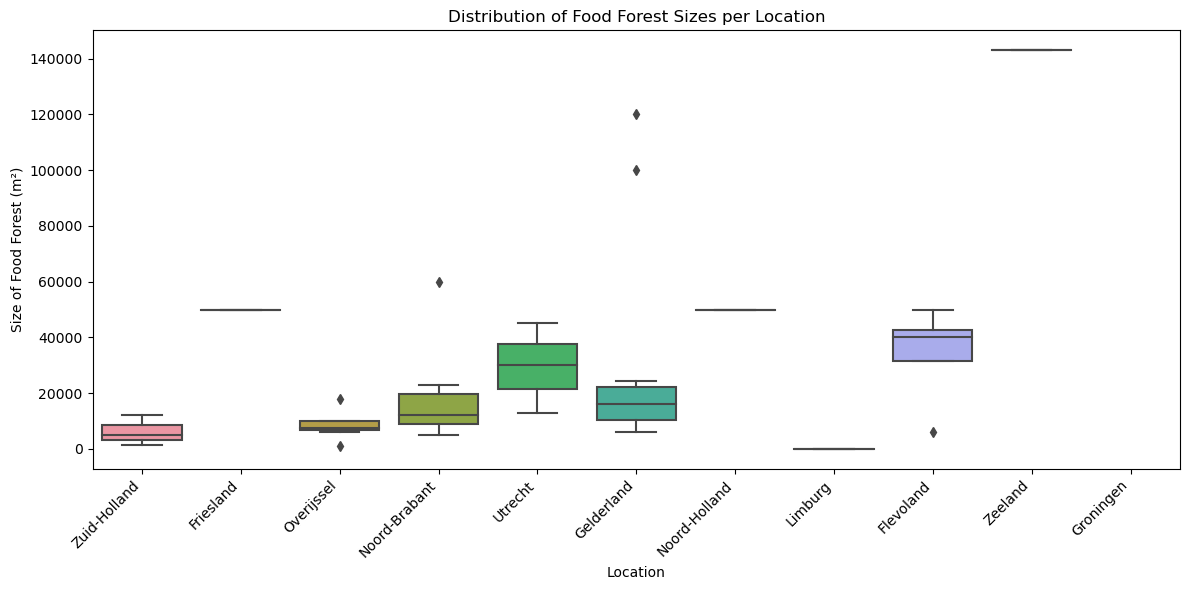

In [105]:
plt.figure(figsize=(12, 6))  # Adjust size as needed
sns.boxplot(data=df_filtered, x='Q3', y='Q2_m2')

plt.xticks(rotation=45, ha='right')  # Rotate x labels if needed
plt.ylabel("Size of Food Forest (m²)")
plt.xlabel("Location")
plt.title("Distribution of Food Forest Sizes per Location")
plt.tight_layout()
plt.show()

#### Age of the foodforests

In [106]:
df_filtered['Q4_year'] = df_filtered['Q4'].astype(str).str.replace(r'\D', '', regex=True).str[:4]

/var/folders/mg/rgpdn71s30sccy9pj35kkd6c0000gn/T/ipykernel_79865/4225512070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Q4_year'] = df_filtered['Q4'].astype(str).str.replace(r'\D', '', regex=True).str[:4]


##### Average, max and min age of foodforests

In [115]:
df_filtered['Q4_year'] = pd.to_numeric(df_filtered['Q4_year'], errors='coerce')

current_year = datetime.now().year
df_filtered['Q4_age'] = current_year - df_filtered['Q4_year']

average_age = df_filtered['Q4_age'].mean()
oldest = df_filtered['Q4_age'].max()
youngest = df_filtered['Q4_age'].min()

print(f" Average age: {average_age:.1f} years")
print(f" Oldest food forest: {oldest} years")
print(f" Youngest food forest: {youngest} years")



 Average age: 6.6 years
 Oldest food forest: 31.0 years
 Youngest food forest: 0.0 years


/var/folders/mg/rgpdn71s30sccy9pj35kkd6c0000gn/T/ipykernel_79865/934269297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Q4_year'] = pd.to_numeric(df_filtered['Q4_year'], errors='coerce')
/var/folders/mg/rgpdn71s30sccy9pj35kkd6c0000gn/T/ipykernel_79865/934269297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Q4_age'] = current_year - df_filtered['Q4_year']


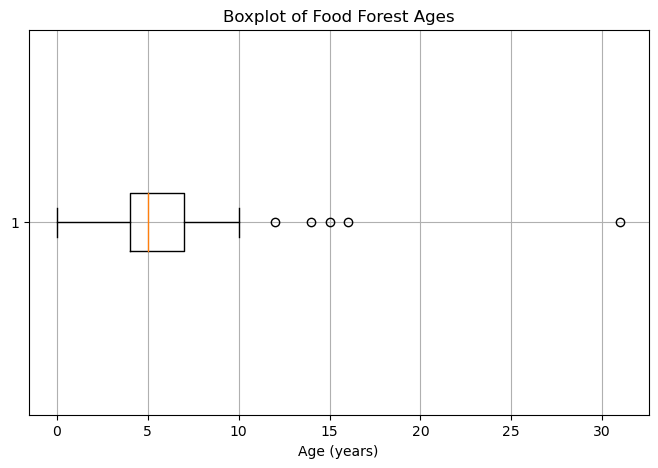

In [108]:
plt.figure(figsize=(8, 5))
plt.boxplot(df_filtered['Q4_age'].dropna(), vert=False)
plt.title("Boxplot of Food Forest Ages")
plt.xlabel("Age (years)")
plt.grid(True)
plt.show()


##### Average, min and max age of foodforests per location and size

In [113]:
bins = [0, 10000, 20000, 30000, float('inf')]
labels = ['0–10,000 m²', '10,000–20,000 m²', '20,000–30,000 m²', '30,000+ m²']

# Assign bins
df_filtered['Q2_size_bin'] = pd.cut(df_filtered['Q2_m2'], bins=bins, labels=labels)

# Group and aggregate
age_by_size_bin = df_filtered.groupby('Q2_size_bin')['Q4_age'].agg(
    count='count',
    average_age='mean',
    min_age='min',
    max_age='max'
).round(1)

age_by_size_bin.head()


/var/folders/mg/rgpdn71s30sccy9pj35kkd6c0000gn/T/ipykernel_79865/2292624157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Q2_size_bin'] = pd.cut(df_filtered['Q2_m2'], bins=bins, labels=labels)


,count,average_age,min_age,max_age
Q2_size_bin,,,,
"0–10,000 m²",22,6.4,2.0,12.0
"10,000–20,000 m²",13,6.2,4.0,15.0
"20,000–30,000 m²",5,6.6,2.0,16.0
"30,000+ m²",10,7.9,0.0,31.0


In [114]:
age_by_location = df_filtered.groupby('Q3')['Q4_age'].agg(
    count='count',
    average_age='mean',
    min_age='min',
    max_age='max'
).round(1)

age_by_location.head()


,count,average_age,min_age,max_age
Q3,,,,
Flevoland,4,8.0,7.0,9.0
Friesland,1,31.0,31.0,31.0
Gelderland,11,6.8,4.0,16.0
Groningen,1,3.0,3.0,3.0
Limburg,1,4.0,4.0,4.0


Cleaning and summary TAM (Q16)

Perceived Usefulness: Q16_1, Q16_2
Perceived Ease of Use: Q16_3, Q16_4
Behavioural Intention: Q16_5

In [116]:
# Show first few rows and column names
df_filtered.head(), df_filtered.columns.tolist()

# Remove the first two rows (metadata) and reset index
clean_df = df_filtered.iloc[2:].reset_index(drop=True)

# Convert Likert scale questions (Q16_1 to Q16_5) to numeric
likert_columns = ['Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_5']
clean_df[likert_columns] = clean_df[likert_columns].apply(pd.to_numeric, errors='coerce')

# Show cleaned data preview and basic descriptive stats for Likert items
clean_df[likert_columns].describe()

# Define which questions belong to which TAM constructs
pu_items = ['Q16_1', 'Q16_2']   # Perceived Usefulness
peou_items = ['Q16_3', 'Q16_4'] # Perceived Ease of Use
bi_items = ['Q16_5']            # Behavioral Intention

# Calculate mean scores per respondent for each TAM construct
clean_df['Perceived Usefulness'] = clean_df[pu_items].mean(axis=1)
clean_df['Perceived Ease of Use'] = clean_df[peou_items].mean(axis=1)
clean_df['Behavioural Intention'] = clean_df[bi_items].mean(axis=1)

# Display summary statistics of TAM scores
clean_df[['Perceived Usefulness', 'Perceived Ease of Use', 'Behavioural Intention']].describe()


# tam_questions = {
#     "Perceived Usefulness (PU)": {
#         "Q16_1": "This platform would help me promote my food forest.",
#         "Q16_2": "This platform would make marketing my products easier."
#     },
#     "Perceived Ease of Use (PEOU)": {
#         "Q16_3": "The platform would be easy to use.",
#         "Q16_4": "I would be able to use this platform without extra help."
#     },
#     "Behavioral Intention (BI)": {
#         "Q16_5": "I would consider using this platform in the future."
#     }
# }

,Perceived Usefulness,Perceived Ease of Use,Behavioural Intention
count,39.000000,39.000000,40.000000
mean,3.141026,3.038462,3.700000
std,1.381021,1.210614,1.244475
min,1.000000,1.000000,1.000000
25%,2.000000,2.250000,3.000000
50%,3.500000,3.000000,4.000000
75%,4.250000,3.750000,5.000000
max,5.000000,5.000000,5.000000


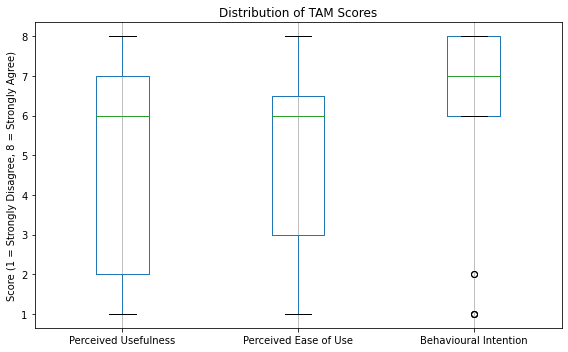

In [97]:

# Set up boxplot
plt.figure(figsize=(8, 5))
clean_df[['Perceived Usefulness', 'Perceived Ease of Use', 'Behavioural Intention']].boxplot()
plt.title('Distribution of TAM Scores')
plt.ylabel('Score (1 = Strongly Disagree, 8 = Strongly Agree)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Barriers to reaching customers (Q9)

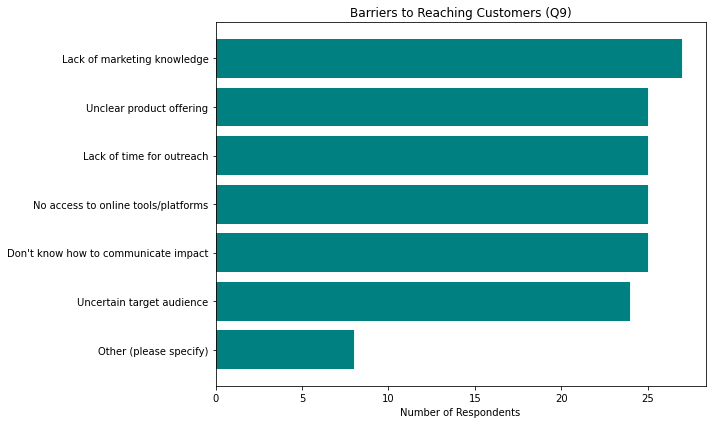


Open-ended responses:
1. nvt
2. onvolgroeid voedselbos
3. Voor mij is het geen probleem, denk echter dat bijna alle voedselbossen nog bitter weinig opbrengst hebben!
4. Niet genoeg producten 
5. we hebben niet die intenties 
6. Ons voedselbos is niet commercieel,  de gemeenschap is de afndselbos is niet 
7. Wij hebben geen verdienmodel en geven alles weg
8. 1
9. geen commerciele instelling
10. zijn een stichting zonder winstoogmerk dus men kan hier gratis voor eigen gebruik komen plukken
11. Nvt
12. wij hebben geen zakelijk belang
13. wij hebben ons voedselbos voor educatieve doeleinden opgezet
14. nog te weinig productie
15. onvoldoende volume
16. Aanvoer van oogst
17. Zure zandgrond, trage groei


In [98]:
# 1. Reload the original column labels (from metadata row)
q9_labels_cleaned = [
    "Lack of marketing knowledge",
    "Unclear product offering",
    "Lack of time for outreach",
    "No access to online tools/platforms",
    "Don't know how to communicate impact",
    "Uncertain target audience",
    "Other (please specify)"
]

# 2. Extract Q9 checkbox counts
q9_columns = [col for col in clean_df.columns if col.startswith("Q9_") and not col.endswith("TEXT")]
q9_counts = clean_df[q9_columns].notnull().sum().sort_values(ascending=False)

# 3. Rebuild DataFrame with readable labels
barriers_df_labeled = pd.DataFrame({
    "Barrier": q9_labels_cleaned,
    "Count": q9_counts.values
}).sort_values(by="Count", ascending=False)

# 4. Plot the results
plt.figure(figsize=(10, 6))
plt.barh(barriers_df_labeled["Barrier"], barriers_df_labeled["Count"], color="teal")
plt.xlabel("Number of Respondents")
plt.title("Barriers to Reaching Customers (Q9)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 5. Print open-ended responses (text answers)
open_responses = clean_df["Q9_7_TEXT"].dropna()

print("\nOpen-ended responses:")
for i, response in enumerate(open_responses, 1):
    print(f"{i}. {response}")


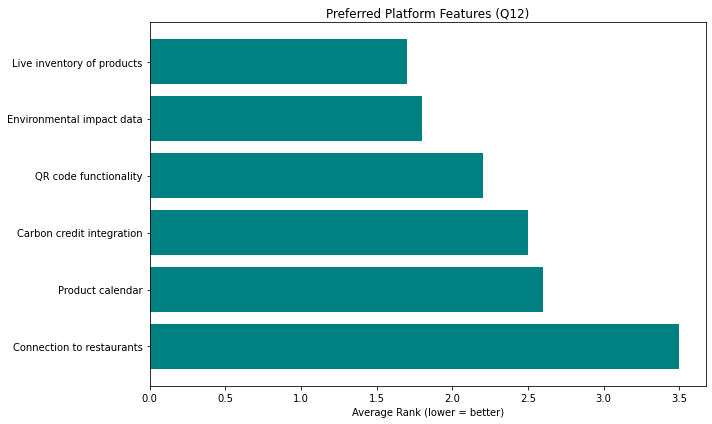


Open-ended responses from Q11 (related to Q12):
1. bij ons is alles sociaal, geen verdien model
2. voor mijzelf is niks echt nodig
3. Voor mij niet van belang
4. Als we een overschot hebben dan willen we dat gratis aanbieden aan mensen die het nodig hebben.
5. Recepten
6. geen commercieel belan
7. ik heb dit ingevuld met het idee dat als ons voedselbos wel commercieel zou mogen verkopen.
8. We gaan voorlopig geen producten verkopen.
9. communicatie binnen netwerk van voedselbossen. Kennis, ervaringen, ideeën en planten/zaden uitwisselen. 
10. logistiek organiseren
11. Is voor onze doelstelling niet interessant 
12. Hoewel zo'n platform handig kan zijn, merken wij dat het succes van de samenwerking zit in laagdrempelig en direct contact met afnemers. Als er nieuwe producten zijn (of oogst rijpt eerder/later af) dan moeten we snel kunnen schakelen. Wij doen dat gewoon via whatsapp. Een oogstkalender of voorraadbeheer klinkt geweldig, maar blijft bij zo'n grote diversiteit en afhankelijk

In [99]:
# 1. Assign readable feature labels
q12_labels_readable = [
    "Live inventory of products",
    "Environmental impact data",
    "Carbon credit integration",
    "Product calendar",
    "Connection to restaurants",
    "QR code functionality"
]

# 2. Extract Q12 checkbox counts
q12_columns = [col for col in clean_df.columns if col.startswith("Q12_") and not col.endswith("TEXT")]
q12_counts = clean_df[q12_columns].apply(pd.to_numeric, errors='coerce')
q12_mean_ranks = q12_counts.mean().sort_values()

# 3. Rebuild DataFrame with readable labels
q12_ranks_df = pd.DataFrame({
    "Feature": [q12_labels_readable[int(col.split("_")[1]) - 1] for col in q12_mean_ranks.index],
    "Average Rank": q12_mean_ranks.values
}).sort_values(by="Average Rank").reset_index(drop=True)

# 4. Plot the results
plt.figure(figsize=(10, 6))
plt.barh(q12_ranks_df["Feature"], q12_ranks_df["Average Rank"], color="teal")
plt.xlabel("Average Rank (lower = better)")
plt.title("Preferred Platform Features (Q12)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 5. Print open-ended responses
# Let's extract open responses from Q11 instead, assuming it's the correct source
q11_text_column = [col for col in clean_df.columns if col.startswith("Q11") and col.endswith("TEXT")]

# Display responses if they exist
if q11_text_column:
    q11_open_responses = clean_df[q11_text_column[0]].dropna()
    print("\nOpen-ended responses from Q11 (related to Q12):")
    for i, response in enumerate(q11_open_responses, 1):
        print(f"{i}. {response}")
else:
    print("No open text responses found for Q11.")


Q6: "Do you sell products?"

Q7: "To whom?"

In [100]:
# Pull Q6 column from the original raw file (not cleaned)
q6_raw = df["Q6"].iloc[2:]  # Skip first two metadata rows

# Map values: 5 = Yes, 4 = No
q6_raw_mapped = q6_raw.map({"4": "Yes", "5": "No"})

# Count occurrences
q6_raw_counts = q6_raw_mapped.value_counts(dropna=False)

q6_raw_counts


No     23
Yes    15
NaN     4
Name: Q6, dtype: int64

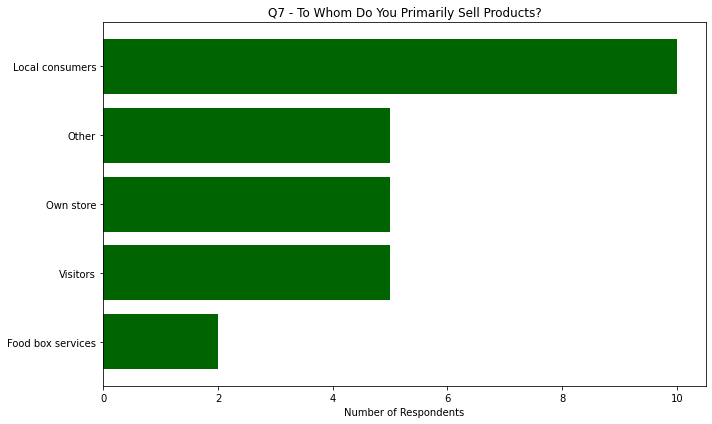


Open-ended responses (Q7_14_TEXT):
1. Leden van het voedselbos
2. Eigen biowinkel ‘Natuurlijk KleinDongen’
3. straatwinkel
4. voedselcooperatie
5. Ik ben in 2023 De Voedselboswinkel gestart. De eerste voedselboswinkel van Nederland. Wij zetten voedselbossen in de spotlight als belangrijke voedselbron in Nederland. Wij verkopen onze eigen oogst en producten en ook van andere voedselbossen. Dit jaar starten we een pilot gezamenlijke oogstverwerking om de keten van voedselbos tot afzet aan te zwengelen. Dit doen we in samenwerking met voedselbosverwerkingsbedrijf Boslekker.


In [101]:
clean_df = df.iloc[2:].reset_index(drop=True)

# Filter only rows where Q6 == 4 (i.e., they sell products)
sellers_df = clean_df[clean_df["Q6"] == "4"]

# Split Q7 multiple choice into flat list
q7_raw = sellers_df["Q7"].dropna().astype(str)
q7_split = q7_raw.str.split(",")
q7_flat = [item.strip() for sublist in q7_split for item in sublist]

# Count frequencies
q7_counts = Counter(q7_flat)

# Define readable labels (based on your Qualtrics or manual list)
q7_labels = {
    "1": "Local consumers",
    "2": "Online consumers",
    "3": "Markets",
    "4": "Restaurants",
    "5": "Stores",
    "6": "Wholesalers",
    "7": "Food cooperatives",
    "8": "CSA",
    "9": "Institutions",
    "10": "Catering",
    "11": "Own store",
    "12": "Visitors",
    "13": "Food box services",
    "14": "Other"
}

# Convert to DataFrame
q7_df = pd.DataFrame({
    "Recipient": [q7_labels.get(k, f"Option {k}") for k in q7_counts.keys()],
    "Count": q7_counts.values()
}).sort_values("Count", ascending=False)

# Display chart
plt.figure(figsize=(10, 6))
plt.barh(q7_df["Recipient"], q7_df["Count"], color="darkgreen")
plt.xlabel("Number of Respondents")
plt.title("Q7 - To Whom Do You Primarily Sell Products?")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Show open-text "Other" responses
open_text_q7 = sellers_df["Q7_14_TEXT"].dropna()
print("\nOpen-ended responses (Q7_14_TEXT):")
for i, txt in enumerate(open_text_q7, 1):
    print(f"{i}. {txt}")

Q10: Denkt u dat zakelijke klanten de waarde van voedselbos producten begrijpen in vergelijking met conventionele alternatieven? Waarom wel of niet?


Maybe categorise the responses?

In [111]:
# Step 1: Locate Q10 columns
q10_columns = [col for col in clean_df.columns if col.startswith("Q10_") and not col.endswith("TEXT")]
q10_text_column = [col for col in clean_df.columns if col.startswith("Q10") and col.endswith("TEXT")]

# Step 2: Count how many times each option was selected (checkboxes)
q10_counts = clean_df[q10_columns].notnull().sum().sort_values(ascending=False)

# Step 3: Get labels from original df
q10_labels = df[q10_columns].iloc[1].values

# Step 4: Build DataFrame
q10_df = pd.DataFrame({
    "Platform Feature": q10_labels,
    "Count": q10_counts.values
}).sort_values(by="Count", ascending=False)

# Step 5: Check open responses if available
if q10_text_column:
    q10_open_responses = clean_df[q10_text_column[0]].dropna().tolist()
else:
    q10_open_responses = []

q10_df, q10_open_responses


# Let's inspect all column names that contain "Q10" to understand how they are labeled
[col for col in clean_df.columns if "Q10" in col]


# Step 1: Extract and count values in the single-response Q10 column
q10_value_counts = clean_df["Q10"].value_counts().sort_index()

# Step 2: Extract label descriptions from the second row of the raw df (metadata)
q10_labels_dict = df.iloc[1].get("Q10", None)

q10_value_counts, q10_labels_dict
    

(Amper                                                                                                                                                                                                                                                                                                                                             1
 Dat hangt van de klant af. Als je het hebt over koks en liefhebbers van voedsel en koken, of mensen die wat meer kennis hebben van duurzame landbouw dan zeker wel maar iedereen let op de prijs (dat is dus bij ons voedselbos geen onderwerp maar weet ik vanuit andere hoek)                                                                   1
 De huidige klanten begrijpen de waarde van voedselbos producten in vergelijking met conventionele alternatieven. Voor nieuwe klanten is dit lastig uit te leggen en is dit echt een proces.                                                                                                                                  

Q13: Houdt u de milieu impact bij

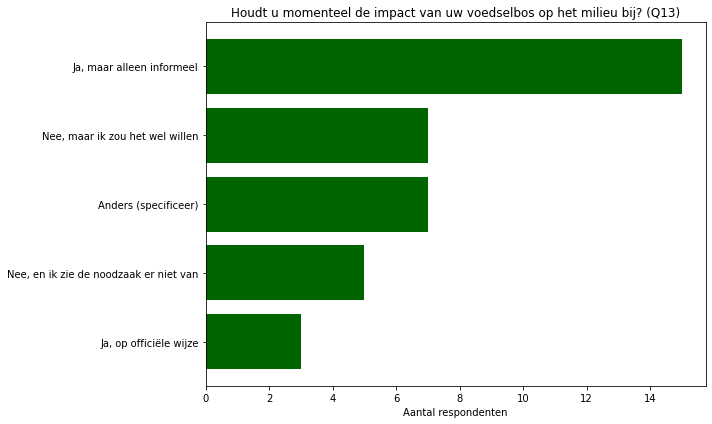


Open tekstantwoorden:
1. Wordt door anderen voor ons gedaan, studenten, monitoringprogramma en Rabobank
2. ehe hoe dan, alleen echt gezonde planten leggen koolstof vast. Meeste voedselbossen zijn behoorlijk ver van optimale gezondheid. En daarbij de meeste koolstof moet weer vrijkomen om de planten te voeden. Het is geen zink waar je alleen maar opslaat maar je wil juist veel koolstof in de bodem zodat deze weer vrij kan komen als de planten het nodig hebben!
3. Nee laat maar geoeien
4.  We maken jaarverslagen waarin we onze ecologische, maatschappelijke en culturele impact tonen 
5. Nee geen tijd voor
6. we informeren elkaar (groepsapp en nieuwsbrief), en het voedselbos wordt tot in detail bijgehouden in GIS
7. Nee, geen (priori)tijd


In [116]:
# Identify Q13 column
q13_column = "Q13"

# Count frequency of responses for Q13
q13_response_counts = clean_df[q13_column].value_counts().sort_index()

# Check if there is a text response column associated with Q13
q13_text_column = [col for col in clean_df.columns if col.startswith("Q13") and col.endswith("TEXT")]

# Extract open-ended responses if available
if q13_text_column:
    q13_open_responses = clean_df[q13_text_column[0]].dropna().reset_index(drop=True)
else:
    q13_open_responses = []

q13_response_counts, q13_open_responses

import matplotlib.pyplot as plt

# Map Q13 response values to labels
q13_mapping = {
    "1": "Ja, op officiële wijze",
    "2": "Ja, maar alleen informeel",
    "3": "Nee, maar ik zou het wel willen",
    "4": "Nee, en ik zie de noodzaak er niet van",
    "5": "Anders (specificeer)"
}

# Convert Q13 responses to strings for mapping
q13_mapped = clean_df["Q13"].astype(str).map(q13_mapping)

# Count frequency of each response
q13_counts = q13_mapped.value_counts().sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(q13_counts.index, q13_counts.values, color="darkgreen")
plt.xlabel("Aantal respondenten")
plt.title("Houdt u momenteel de impact van uw voedselbos op het milieu bij? (Q13)")
plt.tight_layout()
plt.show()

# Show open text responses if any
if "Q13_5_TEXT" in clean_df.columns:
    q13_open_responses = clean_df["Q13_5_TEXT"].dropna().reset_index(drop=True)
    print("\nOpen tekstantwoorden:")
    for i, response in enumerate(q13_open_responses, 1):
        print(f"{i}. {response}")


Q14: Houdt u een database bij met de producten die u verkoopt in uw voedselbos?

In [114]:
# Define mapping for Q14 responses
q14_mapping = {
    "1": "Yes",
    "2": "No"
}

# Map Q14 values to human-readable text
q14_mapped = clean_df["Q14"].map(q14_mapping)

# Count frequency of each response
q14_response_counts_named = q14_mapped.value_counts().sort_index()

# Extract open-ended responses (for those who answered "No")
q14_open_responses = clean_df.loc[clean_df["Q14"] == "2", "Q14_2_TEXT"].dropna().reset_index(drop=True)

q14_response_counts_named, q14_open_responses


(No     31
 Yes     6
 Name: Q14, dtype: int64,
 0                                                   nvt
 1                             Verkopen nog niet serieus
 2                                   het is nog minimaal
 3                                 Te veel administratie
 4                                          te veel werk
 5                            Nog niet genoeg producten.
 6                           Productie is nog zeer laag 
 7                              Niet gericht op verkoop 
 8                                      Nog geen verkoop
 9                                             Kost tijd
 10                                   We verkopen niets 
 11                                           veel gedoe
 12                       Daarvoor is het nog te weinig.
 13                                         verkoop niet
 14                                            geen tijd
 15                        normaal zou je dat wel doen. 
 16                                     